In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

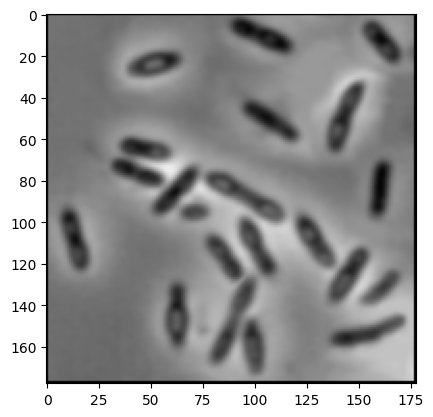

In [2]:
img = cv2.imread("/home/kkyu/amr_ws/opencv/data/bacteria.tif")
plt.imshow(img)

### 레이블링 ( connectedComponentsWithStats )

- 영상의 확대와 축소(크기 변환) - cv2.resize 함수
- 컬러 변환 - cvtColor 함수

In [3]:
img_resize = cv2.resize(img, None, fx=3, fy=3)
img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)

ret, img_threshold = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

numOfLabels, img_labels, stats, centroids = cv2.connectedComponentsWithStats(img_threshold, connectivity=8, ltype=cv2.CV_32S)

# Labeling results with rectangles and numbers
for j in range(1, numOfLabels):
    area = stats[j, cv2.CC_STAT_AREA]
    left = stats[j, cv2.CC_STAT_LEFT]
    top = stats[j, cv2.CC_STAT_TOP]
    width = stats[j, cv2.CC_STAT_WIDTH]
    height = stats[j, cv2.CC_STAT_HEIGHT]

    cv2.rectangle(img_resize, (left, top), (left + width, top + height), (0, 0, 255), 1)
    cv2.putText(img_resize, str(j), (left + 20, top + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)

cv2.imshow("img_resize", img_resize)

print("numOfLabels:", numOfLabels - 1)  # Subtract 1 for the final numbering
cv2.waitKey(0)
cv2.destroyAllWindows()


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kkyu/venv/opencv/lib/python3.10/site-packages/cv2/qt/plugins"


numOfLabels: 21
